Activate TensorFlow

In [171]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

<br> <br> <br> <br>Ex 2 : Import libraries

In [172]:
from __future__ import absolute_import , division , print_function ,unicode_literals
# TensorFlow and tf. keras 
import tensorflow as tf
from tensorflow import keras
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

<br> <br> <br> <br>
Ex3

In [173]:
print (tf.__version__ )


2.4.0


<br> <br> <br> <br>
Ex 4

In [174]:
data = keras.datasets.cifar10
cifar10_data = data.load_data ()


<br> <br> <br> <br>
Ex 5 : Data structure

In [175]:
import pandas as pd 

In [176]:
df=pd.DataFrame(cifar10_data)

In [177]:
type(cifar10_data)

tuple

In [178]:
len(cifar10_data[1])

2

In [179]:
len(cifar10_data[1][1])

10000

In [180]:
cifar10_data[1][1][1][0]

8

In [181]:
type(cifar10_data),type(cifar10_data[1]),type(cifar10_data[1][1]),type(cifar10_data[1][1][1])

(tuple, tuple, numpy.ndarray, numpy.ndarray)

In [182]:
len(cifar10_data),len(cifar10_data[1]),len(cifar10_data[1][1]),len(cifar10_data[1][1][1])

(2, 2, 10000, 1)

<br> <br> <br> <br>
Ex 6 : Set training and testing sets


In [183]:
( train_images , train_labels ) ,( test_images , test_labels ) =cifar10_data


In [184]:
len(train_images),len(train_labels),len(test_images),len(test_labels)

(50000, 50000, 10000, 10000)

<br> <br> <br>
Ex 7 

In [185]:
print (train_labels)
print (train_labels.shape )

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
(50000, 1)


In [186]:
class_names = [ 'airplane ' , 'automobile ' , 'bird' , 'cat' , 'deer',
               'dog' , 'frog' , 'horse' , 'ship' , 'truck']

(<matplotlib.image.AxesImage at 0x7f111c8e5748>, array([3], dtype=uint8))

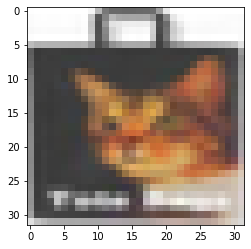

In [187]:
plt . imshow ( train_images [ 3000 ]),train_labels[3000]

In [188]:
import numpy
unique, counts = numpy.unique(train_labels, return_counts=True)
dict(zip(unique, counts))

{0: 5000,
 1: 5000,
 2: 5000,
 3: 5000,
 4: 5000,
 5: 5000,
 6: 5000,
 7: 5000,
 8: 5000,
 9: 5000}

There are many kind of pictures fit a model to train what is this thing thanks to train images and labels

<br> <br> <br> <br>


Ex 8 et 9 : Data exploration and preprocessing

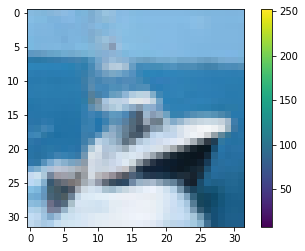

array([8], dtype=uint8)

In [189]:
index = 8
plt . figure ()
plt . imshow ( train_images [ index ])
plt . colorbar ()
plt . grid ( False )
plt . show ()

train_labels[ index ]


In [190]:
train_labels[1][0]

9

<br> <br> <br> <br>
Ex 10 : On affiche les images et le label correspondant

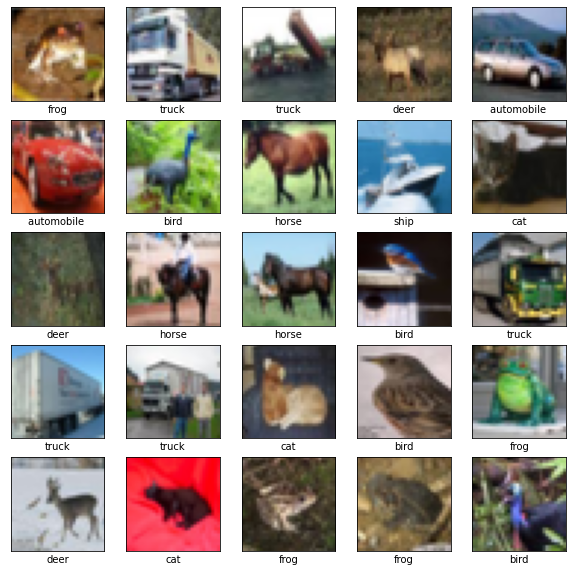

In [191]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

<br> <br> <br> <br>
Ex 11

We normalize the data

In [192]:
train_images = train_images/ 255.0
test_images = test_images/ 255.0

<br> <br> <br> <br> Ex 12 : Model creation

flatter : for pixels 32x32 pixels, 3 images   
128 : neurons  
10 classes

In [193]:
model = keras . Sequential ([
  keras.layers.Flatten( input_shape =(32 , 32 , 3) ) ,
  keras.layers.Dense(128 , activation ="relu"),
  keras.layers.Dense(10 , activation ="softmax") ])


<br><br><br><br>
Ex 13 

In [194]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics =['accuracy'])

<br><br><br><br> 
Ex 14 : fitting the model with train data

In [195]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 2.0583 - accuracy: 0.2632
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7759 - accuracy: 0.3665
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7161 - accuracy: 0.3881
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6813 - accuracy: 0.4008
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6578 - accuracy: 0.4050
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6474 - accuracy: 0.4097
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6201 - accuracy: 0.4186
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6187 - accuracy: 0.4211
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6010 - accuracy: 0.4263
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.590

<br><br><br><br><br>
Ex 15

In [196]:
test_loss , test_acc = model.evaluate(test_images , test_labels ,verbose =2)

313/313 - 1s - loss: 1.6372 - accuracy: 0.4104


<br><br><br><br> Ex 16 Shows for every label the probability predicted to be the label

In [197]:
predictions = model.predict(test_images)

In [198]:
predictions[0]

array([0.02022403, 0.00431376, 0.09029061, 0.30409402, 0.04510137,
       0.23853196, 0.24414316, 0.01341981, 0.03682794, 0.00305333],
      dtype=float32)

<br> 
On vérifie le classement des prédictions de label et les réels labels, on voit que le premier label prédit correspond 3-3, le deuxieme label ne correspond pas mais le troisième label correspond

In [199]:
print(list(map(np.argmax, predictions[:3])))
print(test_labels[:3])

[3, 9, 8]
[[3]
 [8]
 [8]]


<br> <br> <br> <br> 
Ex 17 : Function to display the image, the prediction rate and the real label

In [200]:
def check_prediction(prediction_label, real_label, images, img_index, names):
  if np.argmax(prediction_label[img_index]) == real_label[img_index]:
    plt.figure()
    plt.imshow(images[img_index])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(color='blue', xlabel ="predicted : {} | {}% | real : {}".format(
        names[np.argmax(prediction_label[img_index])], round(max(prediction_label[img_index])*100)
        ,names[int(real_label[img_index])]))
  else:
    plt.figure()
    plt.imshow(images[img_index])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(color='red', xlabel ="predicted : {} | {}% | real : {}".format(
        names[np.argmax(prediction_label[img_index])], round(max(prediction_label[img_index])*100)
        ,names[int(real_label[img_index])]))

<Figure size 720x720 with 0 Axes>

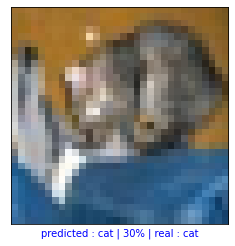

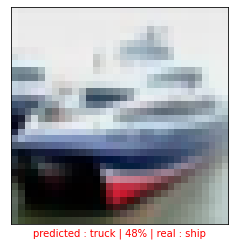

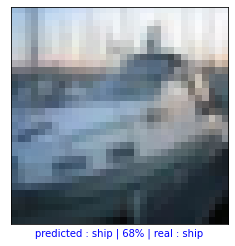

In [201]:
plt.figure(figsize=(10,10)) 

for i in range(3):
  
    check_label(predictions, test_labels, test_images, i, class_names)

plt.show()

<br> <br> 
Ex 18 <br>These are the probabilites of the labels predicted for the fifth image in the test set, the predicted label for this prediction is the 6th label, we can see below that it corresponds

In [202]:
model.predict(np.expand_dims(test_images[5],axis=0))

array([[0.00485978, 0.01866059, 0.03426145, 0.21190707, 0.02176296,
        0.21592526, 0.44616675, 0.03440956, 0.00057677, 0.0114697 ]],
      dtype=float32)

In [203]:
print(np.argmax(predictions[5]))
print(test_labels[5])

6
[6]


<br><br><br><br>
Ex 19

In [204]:
modelBis = keras.Sequential([
     keras.layers.Flatten(input_shape=(32,32,3)),
     keras.layers.Dense(254, activation="relu"),
     keras.layers.Dense(128, activation="relu"),
     keras.layers.Dense(128, activation="tanh"),
     keras.layers.Dense(10,activation='softmax')
                    
])



In [205]:
modelBis.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics =['accuracy']) 

modelBis.fit(train_images, train_labels, epochs=10, validation_batch_size=64)

Epoch 1/10
1563/1563 [==============================] - 13s 8ms/step - loss: 2.0421 - accuracy: 0.2433
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.7097 - accuracy: 0.3804
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.5951 - accuracy: 0.4295
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.5398 - accuracy: 0.4510
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.5029 - accuracy: 0.4615
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.4738 - accuracy: 0.4659
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.4373 - accuracy: 0.4813
Epoch 8/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.4205 - accuracy: 0.4953
Epoch 9/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3931 - accuracy: 0.5015
Epoch 10/10
1563/1563 [==============================] - 12s 8ms/step - l

<br><br> <br> 
Ex 20 <br>
Let's take the mnist dataset

In [206]:

( train_images , train_labels ) ,( test_images , test_labels ) = tf.keras.datasets.fashion_mnist.load_data()


In [207]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [208]:
train_images.shape, len(train_labels)

((60000, 28, 28), 60000)

In [209]:
test_images.shape ,len(test_labels)

((10000, 28, 28), 10000)

Normalize data

In [210]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [211]:
unique, counts = numpy.unique(train_labels, return_counts=True)
dict(zip(unique, counts))

{0: 6000,
 1: 6000,
 2: 6000,
 3: 6000,
 4: 6000,
 5: 6000,
 6: 6000,
 7: 6000,
 8: 6000,
 9: 6000}

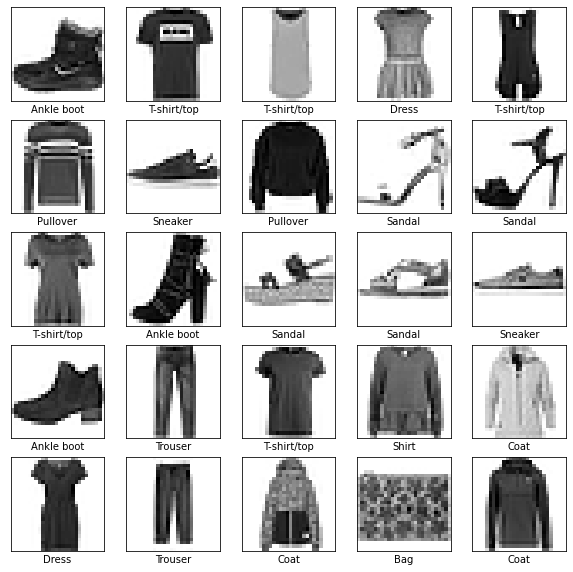

In [212]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Model construction with attributes test variation to get the best accuracy

In [221]:
modelBisBis = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(254, activation="relu"),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation="tanh"),
    keras.layers.Dense(10)
])
modelBisBis.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics =['accuracy']) 

modelBisBis.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5765 - accuracy: 0.7936
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3665 - accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3245 - accuracy: 0.8791
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2989 - accuracy: 0.8889
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2837 - accuracy: 0.8941
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2669 - accuracy: 0.8980
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2538 - accuracy: 0.9040
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2440 - accuracy: 0.9083
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2317 - accuracy: 0.9113
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.229

In [223]:
test_loss , test_acc = modelBisBis.evaluate(test_images , test_labels ,verbose =2)

313/313 - 0s - loss: 0.3361 - accuracy: 0.8854


In [224]:
predictions = modelBisBis.predict(test_images)

We can see that prediction is very good here we can see below labels predicted and real labels

In [225]:
print(list(map(np.argmax, predictions[:3])))
print(test_labels[:3])

[9, 2, 1]
[9 2 1]


<Figure size 720x720 with 0 Axes>

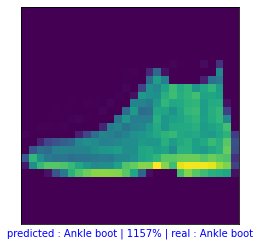

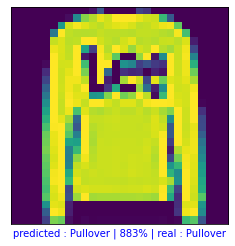

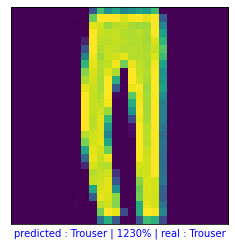

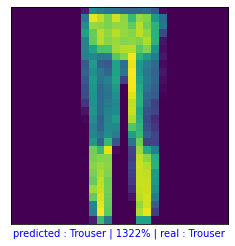

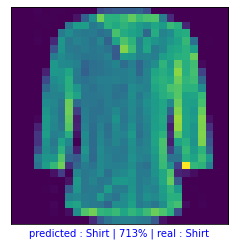

In [227]:
plt.figure(figsize=(10,10)) 

for i in range(5):
  
    check_label(predictions, test_labels, test_images, i, class_names)

plt.show()

In [232]:
%%shell

jupyter nbconvert --to html /content/thomas_trang_week1.ipynb

[NbConvertApp] Converting notebook /content/thomas_trang_week1.ipynb to html
[NbConvertApp] Writing 931752 bytes to /content/thomas_trang_week1.html
